In [466]:
reset -fs

In [467]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd                                 #used
import datetime                                     #used
from scipy import stats
import statsmodels.formula.api as smf               #used
import statsmodels.api as sms
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
import plotly.express as px                         #used
from sklearn.model_selection import cross_val_score #used
from sklearn.model_selection import train_test_split#used

%matplotlib inline

In [468]:
houses = pd.read_csv('King_County_House_prices_dataset.csv')

In [469]:
houses.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [470]:
houses['month_sold'] = pd.DatetimeIndex(houses['date']).month

In [471]:
houses['dol_per_sqft'] = houses.price / houses.sqft_living

In [472]:
houses.sqft_basement.replace('?',0.0, inplace=True)
houses['sqft_basement'] = houses.sqft_basement.astype('float64')
houses['waterfront'] = houses.waterfront.astype('category')
houses['condition'] = houses.condition.astype('category')
houses['grade'] = houses.grade.astype('category')
houses['zipcode'] = houses.zipcode.astype('category')
houses['yr_built'] = houses.yr_built.astype('category')
mean=houses['view'].mean()
houses['view'].replace(np.nan,mean, inplace=True)

In [473]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null category
view             21597 non-null float64
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null category
yr_renovated     17755 non-null float64
zipcode          21597 non-null category
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month_sold       21597 non-null int64
dol_per_sqft     21597 

In [474]:
houses['basement_present'] = houses['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
houses['basement_present'] = houses.basement_present.astype('category')

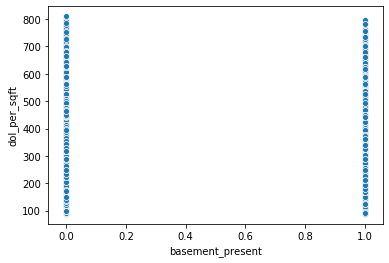

In [477]:
sns.scatterplot(x=houses['basement_present'], y=houses['dol_per_sqft'], data=houses)

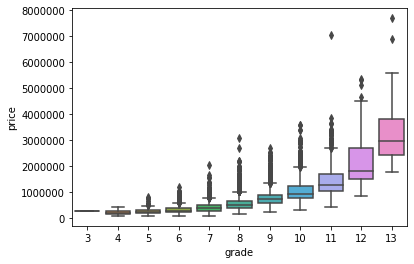

In [478]:
sns.boxplot(x=houses['grade'], y=houses['price'], data=houses)

In [479]:
group_waterfront = houses.groupby(['waterfront'])

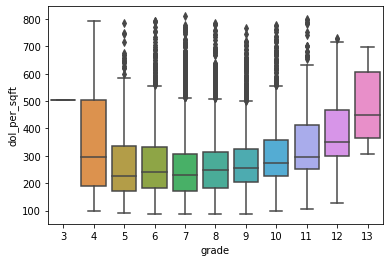

In [480]:
sns.boxplot(x=houses['grade'], y=houses['dol_per_sqft'], data=houses)

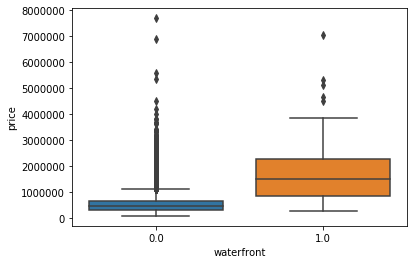

In [481]:
sns.boxplot(x=houses['waterfront'], y=houses['price'], data=houses)

In [482]:
dummies_waterfront = pd.get_dummies(data=houses.waterfront, prefix='waterfront', drop_first=True)
dummies_condition = pd.get_dummies(data=houses.condition,prefix='condition', drop_first=True)
dummies_grade = pd.get_dummies(data=houses.grade,prefix='grade', drop_first=True)

In [483]:
houses = houses.join(dummies_waterfront)
houses = houses.join(dummies_condition)
houses = houses.join(dummies_grade)

In [484]:
houses.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors waterfront  view  ... grade_4 grade_5  grade_6  grade_7  \
0      5650     1.0        NaN   0.0  ...       0       0        0        1   
1      7242     2.0        0.0   0.0  ...       0       0        0        1   

  grade_8  grade_9 grade_10  grade_11  grade_12  grade_13  
0       0        0        0         0         0         0  
1       0        0        0         0         0         0  

[2 rows x 39 columns]

In [485]:
group_grade = houses.query('grade_4==1')
print(group_grade)

               id        date     price  bedrooms  bathrooms  sqft_living  \
350    7325600160    6/4/2014  299000.0         1       0.75          560   
465    8658300340   5/23/2014   80000.0         1       0.75          430   
1065   3340401535   11/5/2014  140000.0         1       1.00          730   
3578   1925069006   12/3/2014  355000.0         1       0.75          530   
3881   5279100625   4/29/2015  248000.0         2       1.00          770   
5199   4048400185  10/22/2014  352000.0         2       0.75          760   
6474   7203601405   4/14/2015  217000.0         2       1.00          730   
7966   3122069029   6/19/2014  120000.0         2       1.00          990   
8588   6730700385  10/22/2014  205000.0         3       0.75          770   
8610   1823069059   6/11/2014  355000.0         1       1.75          750   
8614   6303400395   1/30/2015  325000.0         1       0.75          410   
9632   4391600065   8/14/2014  330000.0         2       0.75          520   

In [486]:
houses.corr()['price'].sort_values()

grade_7          -0.316053
grade_6          -0.209463
grade_5          -0.084549
condition_2      -0.051432
grade_4          -0.031618
condition_4      -0.030759
id               -0.016772
month_sold       -0.009928
grade_8           0.004576
condition_3       0.006948
long              0.022036
condition_5       0.057531
sqft_lot15        0.082845
sqft_lot          0.089876
yr_renovated      0.129599
grade_13          0.211806
grade_9           0.235859
floors            0.256804
waterfront_1.0    0.264306
grade_12          0.291068
lat               0.306692
bedrooms          0.308787
sqft_basement     0.321108
grade_10          0.340944
grade_11          0.357589
view              0.393749
bathrooms         0.525906
dol_per_sqft      0.556056
sqft_living15     0.585241
sqft_above        0.605368
sqft_living       0.701917
price             1.000000
Name: price, dtype: float64

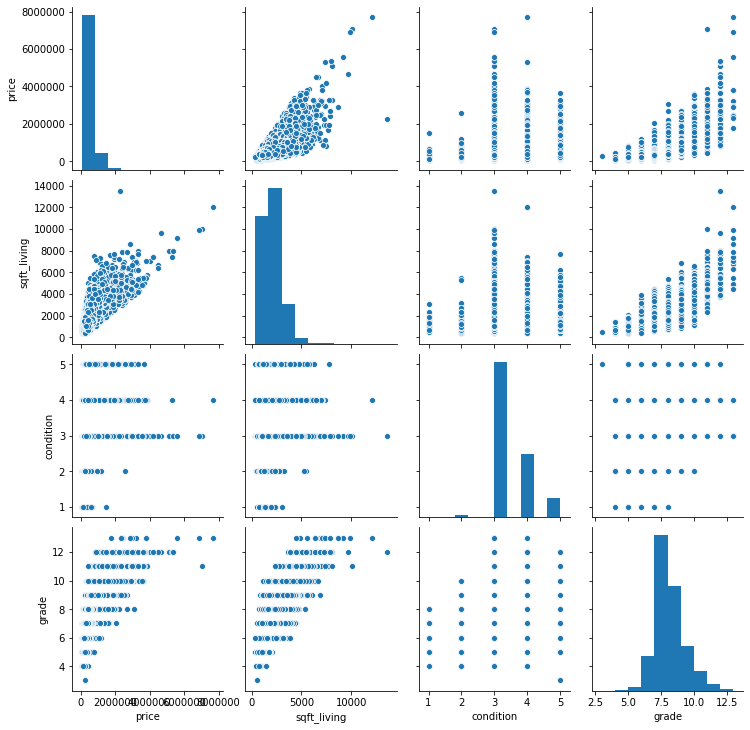

In [487]:
sns.pairplot(houses[['price','sqft_living','condition','grade']])

In [488]:
smf.ols(formula='price ~ waterfront + sqft_living + zipcode + grade', data=houses).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1070.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:48:19   Log-Likelihood:            -2.5739e+05
No. Observations:               19221   AIC:                         5.149e+05
Df Residuals:                   19139   BIC:                         5.156e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.258e+05   1.59e+05      0.790      0.430   -1.86e+05    4.38e+05
waterfront[T.1.0]  8.474e+05   1.36e+04     62.265      0.000    8.21e+05    8.74e+05
zipcode[T.98002]   1.626e+04   1.48e+04      1.101      0.271   -1.27e+04    4.52e+04
zipcode[T.98003]   4981.8909   1.33e+04      0.376      0.707    -2.1e+04     3.1e+04
zipcode[T.98004]   7.828e+05    1.3e+04     60.263      0.000    7.57e+05    8.08e+05
zipcode[T.98005]   3.151e+05   1.54e+04     20.414      0.000    2.85e+05    3.45e+05
zipcode[T.98006]   2.748e+05   1.17e+04     23.413      0.000    2.52e+05    2.98e+05
zipcode[T.98007]   2.564e+05   1.69e+04     15.174      0.000    2.23e+05     2.9e+05
zipcode[T.98008]   2.885e+05   1.32e+04     21.774      0.000    2.63e+05    3.14e+05
zipcode[T.98010]   7.365e+04   1.92e+04      3.845      0.000    3.61e+04    1.11e+05
zipcode[T.98011]    1.33e+05   1.49e+04      8.948      0.000    1.04e+05    1.62e+05
zipcode[T.98014]   1.046e+05   1.75e+04      5.972      0.000    7.03e+04    1.39e+05
zipcode[T.98019]    9.13e+04   1.51e+04      6.048      0.000    6.17e+04    1.21e+05
zipcode[T.98022]   4.806e+04   1.41e+04      3.416      0.001    2.05e+04    7.56e+04
zipcode[T.98023]  -2.601e+04   1.16e+04     -2.252      0.024   -4.87e+04   -3369.889
zipcode[T.98024]   1.704e+05   2.06e+04      8.289      0.000     1.3e+05    2.11e+05
zipcode[T.98027]   1.665e+05   1.21e+04     13.796      0.000    1.43e+05     1.9e+05
zipcode[T.98028]   1.361e+05   1.33e+04     10.268      0.000     1.1e+05    1.62e+05
zipcode[T.98029]   2.148e+05   1.29e+04     16.711      0.000     1.9e+05     2.4e+05
zipcode[T.98030]   2462.3518   1.36e+04      0.182      0.856   -2.41e+04     2.9e+04
zipcode[T.98031]   1.979e+04   1.34e+04      1.475      0.140   -6505.729    4.61e+04
zipcode[T.98032]   9547.0020   1.72e+04      0.555      0.579   -2.42e+04    4.33e+04
zipcode[T.98033]   3.718e+05    1.2e+04     30.903      0.000    3.48e+05    3.95e+05
zipcode[T.98034]   2.099e+05   1.14e+04     18.487      0.000    1.88e+05    2.32e+05
zipcode[T.98038]   3.607e+04   1.12e+04      3.231      0.001    1.42e+04    5.79e+04
zipcode[T.98039]   1.258e+06   2.55e+04     49.403      0.000    1.21e+06    1.31e+06
zipcode[T.98040]   5.395e+05   1.35e+04     39.829      0.000    5.13e+05    5.66e+05
zipcode[T.98042]   1.412e+04   1.13e+04      1.245      0.213   -8107.667    3.63e+04
zipcode[T.98045]   1.104e+05   1.45e+04      7.615      0.000     8.2e+04    1.39e+05
zipcode[T.98052]   2.384e+05   1.13e+04     21.090      0.000    2.16e+05    2.61e+05
zipcode[T.98053]   2.107e+05   1.22e+04     17.333      0.000    1.87e+05    2.34e+05
zipcode[T.98055]   4.744e+04   1.35e+04      3.505      0.000    2.09e+04     7.4e+04
zipcode[T.98056]    1.01e+05   1.21e+04      8.363      0.000    7.73e+04

In [489]:
smf.ols(formula='price ~ sqft_living + zipcode + dol_per_sqft', data=houses).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2507.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:48:19   Log-Likelihood:            -2.8335e+05
No. Observations:               21597   AIC:                         5.668e+05
Df Residuals:                   21525   BIC:                         5.674e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -6.08e+05   7015.462    -86.663      0.000   -6.22e+05   -5.94e+05
zipcode[T.98002]  3.659e+04   1.07e+04      3.427      0.001    1.57e+04    5.75e+04
zipcode[T.98003] -6673.2597   9625.382     -0.693      0.488   -2.55e+04    1.22e+04
zipcode[T.98004]  9.594e+04   1.02e+04      9.415      0.000     7.6e+04    1.16e+05
zipcode[T.98005] -3.912e+04   1.15e+04     -3.400      0.001   -6.17e+04   -1.66e+04
zipcode[T.98006] -2.618e+04   8642.279     -3.029      0.002   -4.31e+04   -9239.962
zipcode[T.98007] -3.726e+04   1.21e+04     -3.074      0.002    -6.1e+04   -1.35e+04
zipcode[T.98008] -1.857e+04   9767.641     -1.901      0.057   -3.77e+04     572.494
zipcode[T.98010] -5.053e+04   1.37e+04     -3.694      0.000   -7.73e+04   -2.37e+04
zipcode[T.98011] -5.179e+04   1.08e+04     -4.800      0.000   -7.29e+04   -3.06e+04
zipcode[T.98014] -3.978e+04   1.26e+04     -3.153      0.002   -6.45e+04   -1.51e+04
zipcode[T.98019] -4.482e+04   1.09e+04     -4.128      0.000   -6.61e+04   -2.35e+04
zipcode[T.98022] -8618.0152   1.02e+04     -0.848      0.396   -2.85e+04    1.13e+04
zipcode[T.98023] -1.527e+04   8351.713     -1.829      0.067   -3.16e+04    1097.276
zipcode[T.98024] -4.411e+04    1.5e+04     -2.941      0.003   -7.35e+04   -1.47e+04
zipcode[T.98027] -5.727e+04   8835.170     -6.482      0.000   -7.46e+04      -4e+04
zipcode[T.98028] -3.864e+04   9642.329     -4.007      0.000   -5.75e+04   -1.97e+04
zipcode[T.98029] -3.503e+04   9401.189     -3.727      0.000   -5.35e+04   -1.66e+04
zipcode[T.98030] -1.064e+04   9876.249     -1.077      0.281      -3e+04    8721.176
zipcode[T.98031] -9010.5575   9695.094     -0.929      0.353    -2.8e+04    9992.545
zipcode[T.98032]  1.402e+04   1.25e+04      1.118      0.264   -1.06e+04    3.86e+04
zipcode[T.98033] -2.146e+04   8947.612     -2.398      0.016    -3.9e+04   -3919.868
zipcode[T.98034] -2.121e+04   8312.724     -2.551      0.011   -3.75e+04   -4914.805
zipcode[T.98038] -3.444e+04   8089.236     -4.258      0.000   -5.03e+04   -1.86e+04
zipcode[T.98039]  4.388e+05   1.91e+04     22.974      0.000    4.01e+05    4.76e+05
zipcode[T.98040]  5.862e+04   1.02e+04      5.773      0.000    3.87e+04    7.85e+04
zipcode[T.98042] -2.027e+04   8198.198     -2.472      0.013   -3.63e+04   -4199.267
zipcode[T.98045] -3.308e+04   1.04e+04     -3.189      0.001   -5.34e+04   -1.27e+04
zipcode[T.98052] -4.372e+04   8292.049     -5.273      0.000      -6e+04   -2.75e+04
zipcode[T.98053] -6.406e+04   8923.909     -7.178      0.000   -8.15e+04   -4.66e+04
zipcode[T.98055] -1689.0082   9751.154     -0.173      0.862   -2.08e+04    1.74e+04
zipcode[T.98056] -2.837e+04   8778.605     -3.232      0.001   -4.56e+04   -1.12e+04
zipcode[T.98058] -2.754e+04   8527.558     -3.230      0.001   -4.43e+04   -1.08e+04
zipcode[T.98059] -5.479

Model evaluation and refinement

In [500]:
fig = px.scatter_mapbox(houses, lat="lat", lon="long",
                        hover_name="price",
                        hover_data=['dol_per_sqft','sqft_living'],
                        color='dol_per_sqft', zoom=7,
                        height=300 , mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [321]:
features =['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15', 'sqft_lot15']    
X = houses[features]
Y = houses['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3240
number of training samples: 18357
